In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
# Replace 'path_to_your_dataset.csv' with the actual file path where you saved the dataset
df = pd.read_csv(r'C:\Users\M\Desktop\ironhacker\amazon\archive (6)\amz_uk_price_prediction_dataset.csv')

# Preview the first few rows
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [29]:
df.shape

(2443651, 9)

In [55]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [57]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [61]:
proportion_table = df['category'].value_counts(normalize=True)
proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [ ]:
#Category of sports and outdoors dominate the listings, with a significant proportion(%34) compared to others.

In [9]:
# Frequency table for product categories
category_counts = df['category'].value_counts()

# the top 5 most listed categories
top_5_categories = category_counts.head(5)
print("Top 5 most listed product categories:")
print(top_5_categories)


Top 5 most listed product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


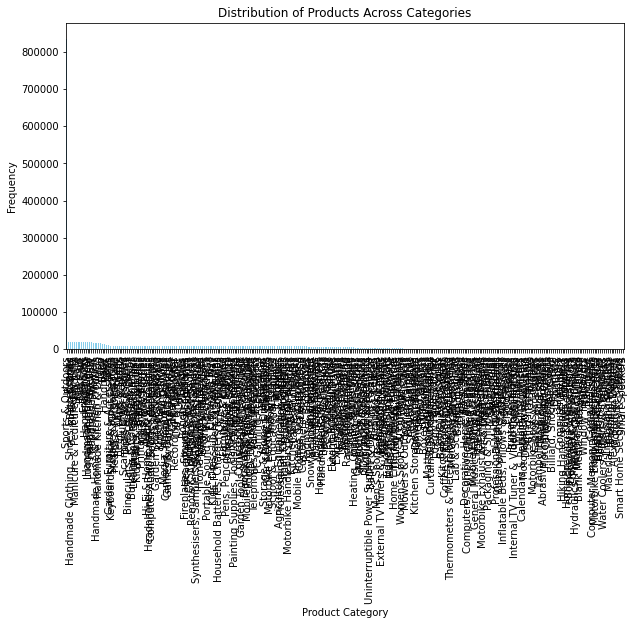

In [11]:
# Bar chart for all categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


<ipython-input-71-fc7ca763f110>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");


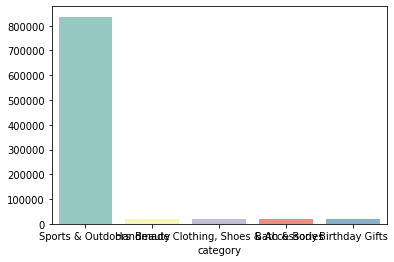

In [71]:
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");

<ipython-input-77-2b78769a5006>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3", width=0.6)  # Decrease width to increase space


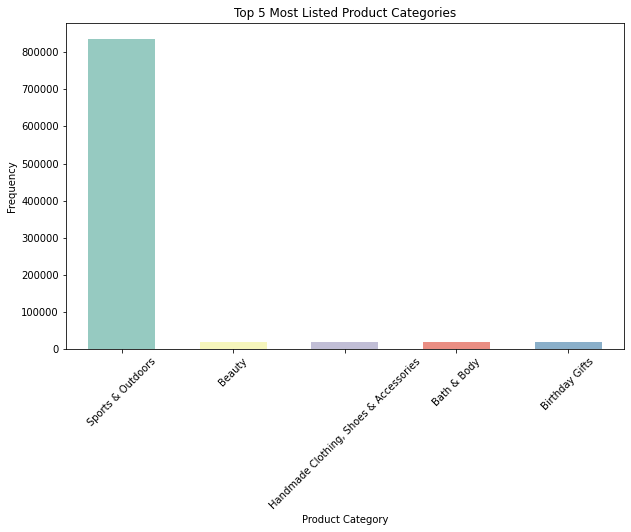

In [77]:
# Plotting the barplot with more space between the bars 
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3", width=0.6)  # Decrease width to increase space
plt.title('Top 5 Most Listed Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
plt.show()


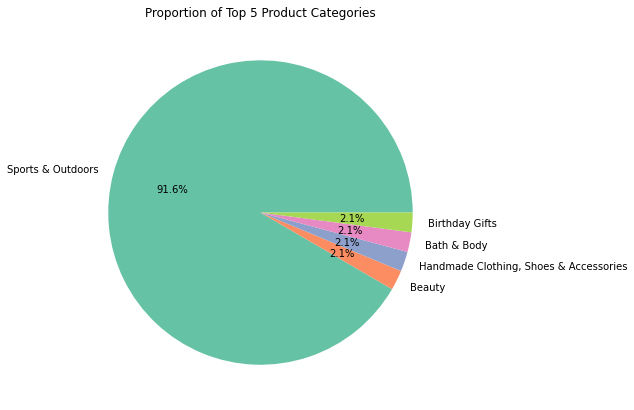

In [13]:
# Pie chart for top 5 categories
plt.figure(figsize=(7, 7))
top_5_categories.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proportion of Top 5 Product Categories')
plt.ylabel('')
plt.show()


In [15]:
#part2: 
# Remove missing or zero price values if any
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df[df['price'] > 0]

# Mean, Median, and Mode for product price
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")


Mean Price: 89.24453985892306
Median Price: 19.09
Mode Price: 9.99


In [17]:
# Dispersion
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"IQR: {iqr_price}")


Variance: 119446.39774346988
Standard Deviation: 345.61018177054603
Range: 99999.99
IQR: 36.0


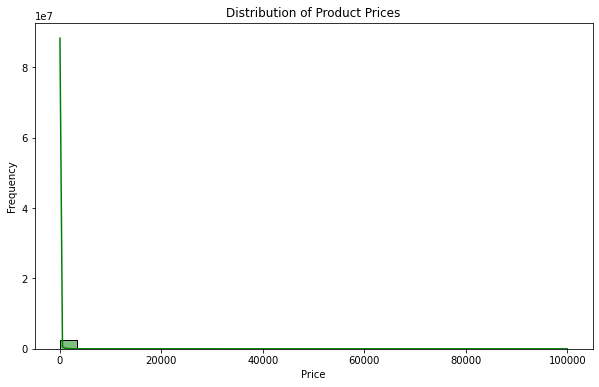

In [19]:
# Histogram for product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


----it's hard to read these diagrams---Solution:
Limit the x-axis: You can restrict the x-axis to focus on a specific price range (e.g., prices under 100). This can make the histogram easier to interpret.
    
Log transformation: Applying a log transformation to the price data before plotting it helps compress higher price values, making the distribution more readable.

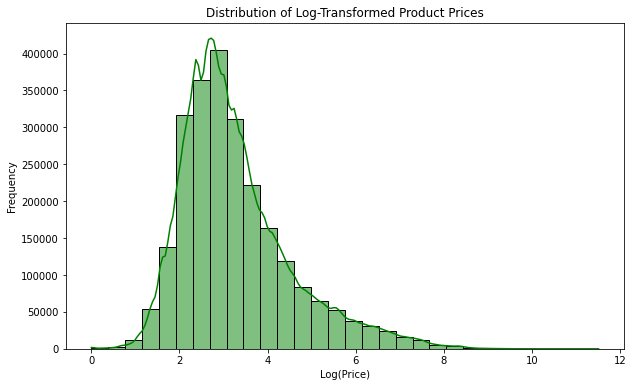

In [73]:
# Adding a small constant to avoid log(0) issue, and then log-transform the price
df['log_price'] = np.log1p(df['price'])

# Histogram with log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True, color='green')
plt.title('Distribution of Log-Transformed Product Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


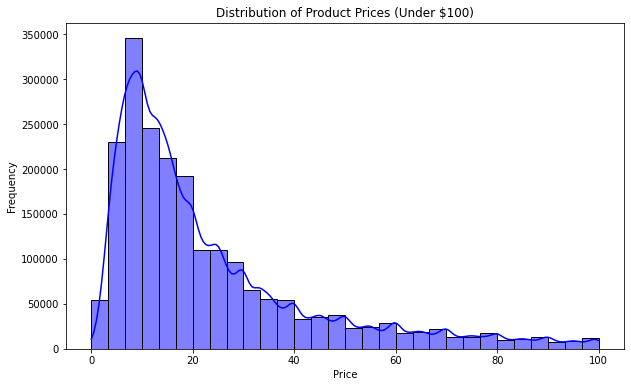

In [75]:
# Histogram with restricted price range (under 100)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 100]['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices (Under $100)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


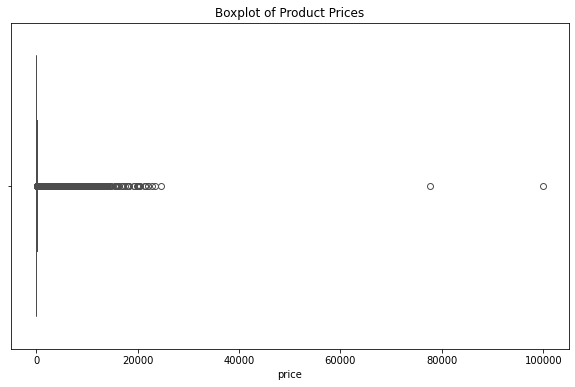

In [21]:
# Boxplot for product prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='orange')
plt.title('Boxplot of Product Prices')
plt.show()


#Prices are varied, with a standard deviation of 345, and significant outliers present, as shown by the box plot.

The mean price being much higher than both the median and mode suggests that the price distribution is positively skewed. In simpler terms, a few very expensive products are pulling the average (mean) upwards.

Thus, while the average price is around 89.24, most products are listed at much lower prices, with a common price of 9.99. This suggests that a smaller number of high-priced products are distorting the mean, whereas the typical product is priced more affordably.

In [33]:
# Convert ratings to numeric (if needed) and handle missing values
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Mean, Median, and Mode for product ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")


Mean Rating: 2.152836472966065
Median Rating: 0.0
Mode Rating: 0.0


In [37]:
df['stars'].count()


2443651

In [41]:
df['stars'].value_counts()


stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [45]:
# Measures of Dispersion for product ratings
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")
print(f"IQR: {iqr_rating}")


Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
IQR: 4.4


----Having 1.2 million ratings of 0 is likely not rational in a typical rating system, as it would be unusual for so many products to have no rating at all.
A rating of 0 could represent missing data, unreviewed products, or improperly logged ratings.
In most analyses, a rating of 0 is often treated as missing data and should be excluded to avoid biasing the results.


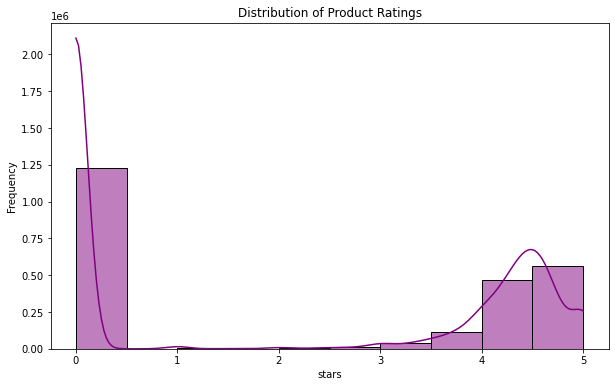

In [53]:
# Histogram for product ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True, color='purple')
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.show()


In [81]:
#After removing "0"
# Filter out rows where the rating is 0
df_ratings_cleaned = df[df['stars'] > 0]

# Recalculate mean, median, mode, skewness, and kurtosis after removing 0 ratings
mean_rating = df_ratings_cleaned['stars'].mean()
median_rating = df_ratings_cleaned['stars'].median()
mode_rating = df_ratings_cleaned['stars'].mode()[0]

skewness_rating = df_ratings_cleaned['stars'].skew()
kurtosis_rating = df_ratings_cleaned['stars'].kurt()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")
print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")


Mean Rating: 4.31916076222691
Median Rating: 4.4
Mode Rating: 4.5
Skewness: -2.3795681122127945
Kurtosis: 9.78193769066435


---The average product rating is quite high, indicating that most customers rate products positively.

Customers typically rate products highly, with most ratings falling between 4.0 and 4.5. This reflects overall customer satisfaction with the products on Amazon UK.

The distribution is negatively skewed (Skewness = -2.38), meaning there is a long tail on the left side of the distribution (lower ratings are less common).
The kurtosis value of 9.78 indicates that the distribution has heavy tails and is more peaked than a normal distribution, meaning a large number of ratings are concentrated around the mode (4.5), with fewer extreme ratings.

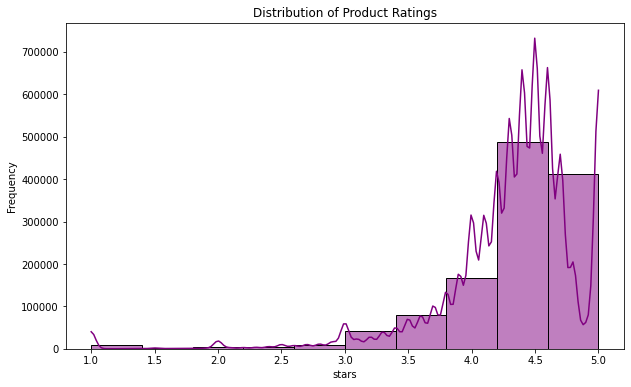

In [83]:
#After removing "0"
plt.figure(figsize=(10, 6))
sns.histplot(df_ratings_cleaned['stars'], bins=10, kde=True, color='purple')
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.show()